### 230528 하은서 필수과제1

- prophet에 들어가는 하이퍼파라미터 다 정리해 주시고, 실제 값을 넣어서 예측값이 변화하는 것을 확인하기( 코드 & 주석 필수 )

#### <font color=cyan> __Prophet__ </font>

- 예측 라이브러리
- 시계열 데이터를 모델링하기 위해

#### <font color=cyan> _changepoint_prior_scale_ </font>
- default 값 0.05 
- 추세에 따라 데이터를 유연하게 반영할 것인지 아닌지 결정하는 파라미터
- 추세에 덜 유연하게 반영하려면 0.05보다 크게 설정


#### <font color=cyan> _seasonality_prior_scale_ </font>
- default 값 10
- 계절의 유연성을 제어하는 파라미터
- 파라미터 값이 크면 계절성의 영향이 커지고, 작으면 영향이 줄어듦
- 합리적인 조정범위는 [0.01, 10] 사이


#### <font color=cyan> _holidays_prior_scale_ </font>
- default 값 10.0
- 휴일의 영향에 따라 유연성을 조정하는 파라미터
- 조절범위 [0.01, 10]


#### <font color=cyan> _seasonality_mode_ </font>
- default 값 'additive'
- 'additive' : 시계열 데이터가 진폭이 일정할 때
- 'multiflicative' : 시계열 데이터의 진폭이 점점 증가하거나 감소할 때


#### <font color=cyan> _changepoint_range_ </font>
- default 값 0.8
- change point의 설정 가능 범위를 의미
- 0.8인경우 데이터의 80% 중 changepoint를 자동으로 설정
- 조절범위 [0.8, 0.95]


#### <font color=cyan> _growth_ </font>
- default 값 linear
- liner, logistic


#### <font color=cyan> _changepoints_</font>
- default 값 auto
- 변경점을 수동으로 설정하기 위한 파라미터


#### <font color=cyan> _n_changepoints_</font>
- default 값 25
- 자동으로 배치된 변경점의 수, 일반적인 시계열의 추세 변화를 파악하기 위해
충분한 수로 설정
- 추세 변화에서 유연성을 변경하는 것이 더 효과적


#### <font color=cyan> _yearly_seasonality_</font>
- default 값 auto
- 데이터와 연간 계절성을 가지려면 true 아니면 false


#### <font color=cyan> _mcmc_samples_</font>
- default 값 0
- 계절의 불확실성을 확인할 때 사용
- 계절성에 대한 불확실성을 얻으려면 전체 베이지안 샘플링을 수행해야함


#### <font color=cyan> _interval_width_</font>
- default 값 0.8
- yhat_upper, yhat_lower 처럼 불확실성 구간을 반환


#### <font color=cyan> _uncertainty_samples_</font>
- default 값 1000
- 불확실성의 구간 조정

In [62]:
import numpy as np
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action = "ignore", category = RuntimeWarning)
import datetime as dt
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
#import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import pandas as pd
import io
#to predictive A
import statistics as st
%matplotlib inline
import matplotlib.dates as mdates
from pandas import DataFrame
from pandas import to_datetime
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller

In [63]:
df=pd.read_csv('sales_data.csv',encoding='unicode_escape')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [64]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [66]:
df_1  = df.copy()
df_1=df_1[df_1.Quantity>0] 
df_1=df_1[df_1.UnitPrice>0]
df_1['ttp']= df_1['Quantity'] * df_1['UnitPrice']

In [67]:
df_1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,ttp
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [68]:
df_psp=df_1[['InvoiceDate','ttp']]
df_psp.rename(columns={'InvoiceDate':'ds','ttp':'y'},inplace=True)
df_psp=df_psp.set_index('ds')
df_psp

,y
ds,
2010-12-01 08:26:00,15.30
2010-12-01 08:26:00,20.34
2010-12-01 08:26:00,22.00
2010-12-01 08:26:00,20.34
2010-12-01 08:26:00,20.34
...,...
2011-12-09 12:50:00,10.20
2011-12-09 12:50:00,12.60
2011-12-09 12:50:00,16.60


In [69]:
df_f = df_psp.resample('D')['y'].sum()
df_f = df_f.to_frame()
df_f

,y
ds,
2010-12-01,58960.79
2010-12-02,47748.38
2010-12-03,46943.71
2010-12-04,0.00
2010-12-05,31774.95
...,...
2011-12-05,88741.96
2011-12-06,56713.21
2011-12-07,75439.16


In [70]:
#prophet 사용을 위해
df_f.reset_index(inplace=True)
df_f

,ds,y
0,2010-12-01,58960.79
1,2010-12-02,47748.38
2,2010-12-03,46943.71
3,2010-12-04,0.00
4,2010-12-05,31774.95
...,...,...
369,2011-12-05,88741.96
370,2011-12-06,56713.21
371,2011-12-07,75439.16
372,2011-12-08,82495.00


In [71]:
# train, test로 나누기

train=df_f[:334]
test = df_f[334:]

In [72]:
train

,ds,y
0,2010-12-01,58960.79
1,2010-12-02,47748.38
2,2010-12-03,46943.71
3,2010-12-04,0.00
4,2010-12-05,31774.95
...,...,...
329,2011-10-26,38059.43
330,2011-10-27,57291.72
331,2011-10-28,40565.70
332,2011-10-29,0.00


### Prophet

In [73]:
prophet = Prophet()
prophet.fit(train)

13:23:44 - cmdstanpy - INFO - Chain [1] start processing
13:23:44 - cmdstanpy - INFO - Chain [1] done processing


In [74]:
future = prophet.make_future_dataframe(periods=30)
forecast = prophet.predict(future)

In [75]:
ph_yhat = forecast[['ds','yhat']][334:]
ph_yhat

,ds,yhat
334,2011-10-31,38260.593425
335,2011-11-01,49189.429890
336,2011-11-02,40520.517859
337,2011-11-03,48162.915020
338,2011-11-04,38626.951221
339,2011-11-05,10323.254989
340,2011-11-06,24050.423930
341,2011-11-07,38853.021137
342,2011-11-08,49781.857602
343,2011-11-09,41112.945570


In [76]:
test

,ds,y
334,2011-10-31,57369.15
335,2011-11-01,29155.15
336,2011-11-02,45888.34
337,2011-11-03,63561.49
338,2011-11-04,62977.36
339,2011-11-05,0.00
340,2011-11-06,42946.34
341,2011-11-07,85881.81
342,2011-11-08,57700.24
343,2011-11-09,66127.57


          ds          yhat    yhat_lower    yhat_upper
0 2010-12-01  29942.972938  12695.909731  47112.436731
1 2010-12-02  37451.762058  19770.785935  54234.441141
2 2010-12-03  27782.190218   9967.564291  44540.679511
3 2010-12-04   -655.114056 -17284.538231  16304.875291
4 2010-12-05  12938.446844  -4032.976427  29596.073233


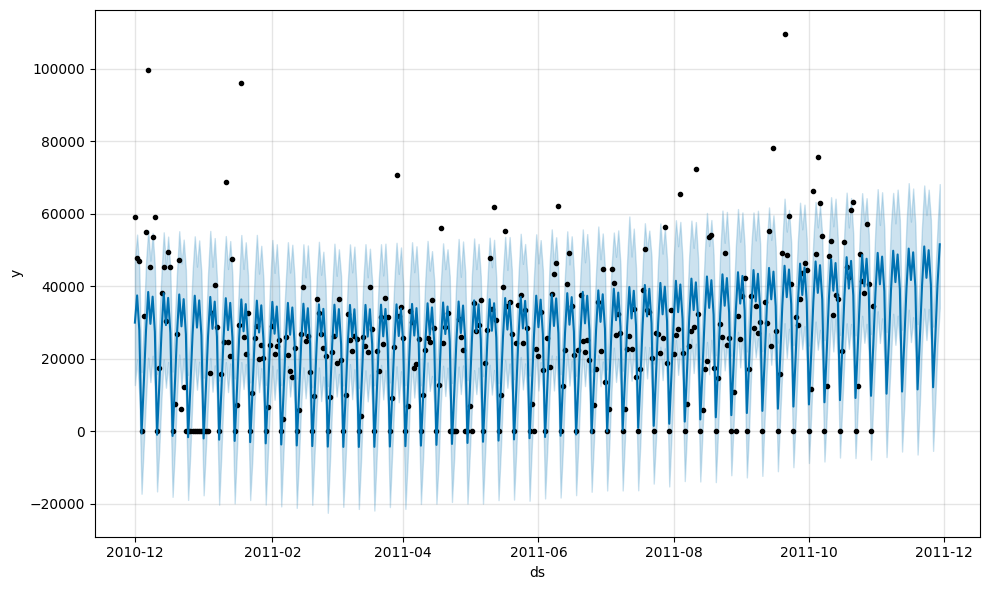

In [77]:
print(forecast[['ds','yhat','yhat_lower','yhat_upper']].head())
prophet.plot(forecast)
plt.show()

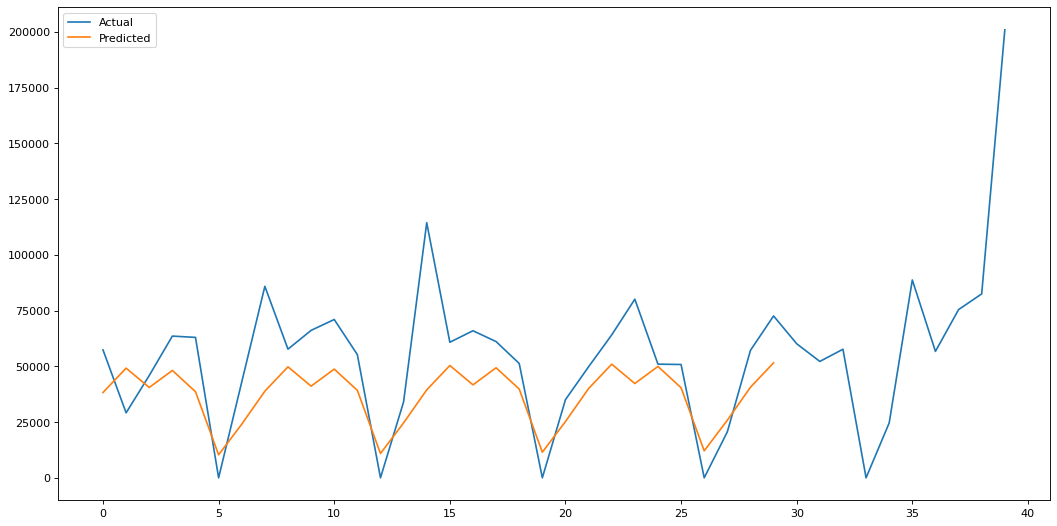

In [78]:
from matplotlib.pyplot import figure
figure(figsize=(16,8), dpi=80)

ph_yhat = forecast[['ds','yhat']][334:]
plt.plot(test['y'].values, label='Actual')
plt.plot(ph_yhat['yhat'].values, label='Predicted')
plt.legend()
plt.show()

### seasonality_prior_scale

13:23:45 - cmdstanpy - INFO - Chain [1] start processing
13:23:45 - cmdstanpy - INFO - Chain [1] done processing


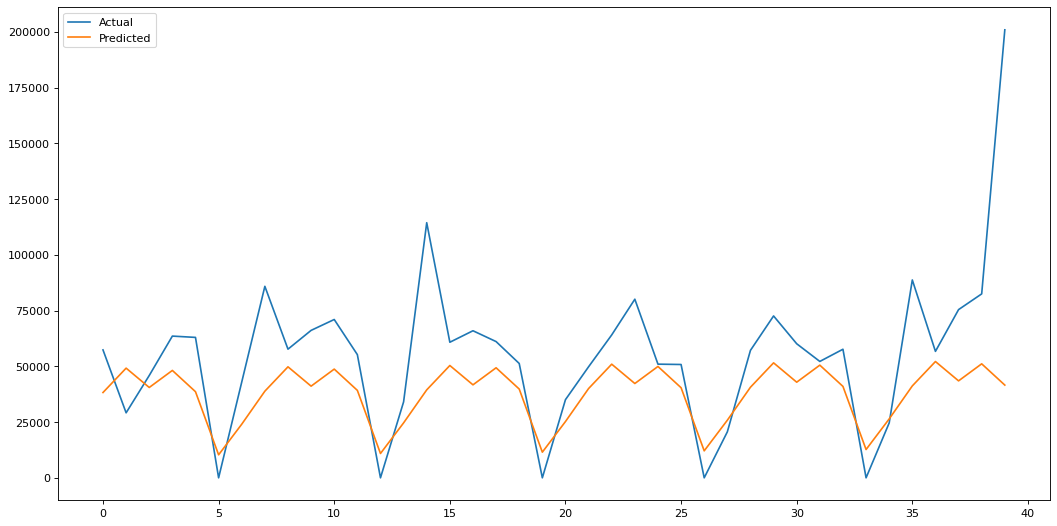

In [79]:
prophet = Prophet(seasonality_prior_scale = 10)  # default 값 10
prophet.fit(train)
future = prophet.make_future_dataframe(periods=40)
forecast = prophet.predict(future)
ph_yhat = forecast[['ds','yhat']][334:]

figure(figsize=(16,8), dpi=80)
plt.plot(test['y'].values, label='Actual')
plt.plot(ph_yhat['yhat'].values, label='Predicted')
plt.legend()
plt.show()


# 기본 prophet에 비해 정확도가 좀 더 떨어짐

### holidays_prior_scale

13:23:46 - cmdstanpy - INFO - Chain [1] start processing
13:23:46 - cmdstanpy - INFO - Chain [1] done processing


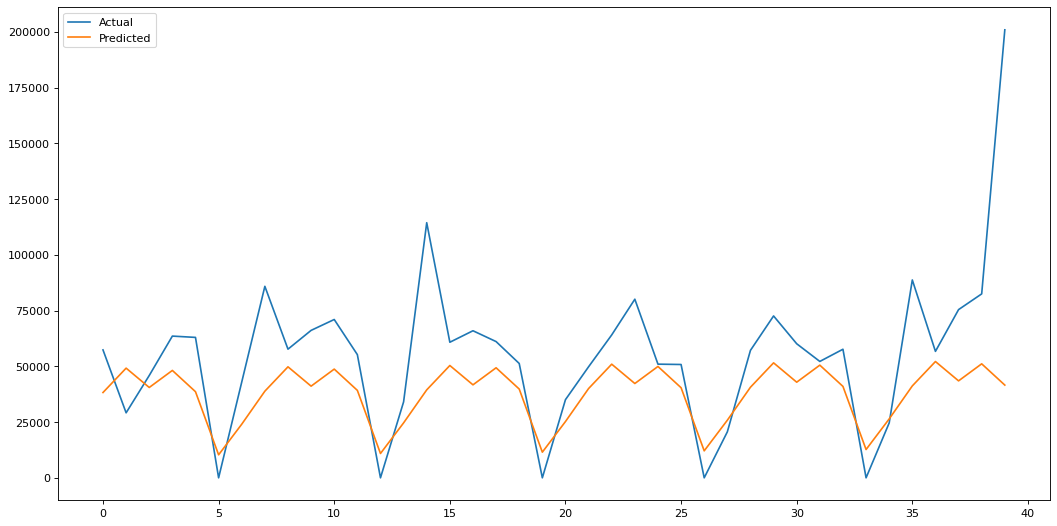

In [80]:
prophet = Prophet(holidays_prior_scale = 5)  # default 값 10
prophet.fit(train)
future = prophet.make_future_dataframe(periods=40)
forecast = prophet.predict(future)
ph_yhat = forecast[['ds','yhat']][334:]

figure(figsize=(16,8), dpi=80)
plt.plot(test['y'].values, label='Actual')
plt.plot(ph_yhat['yhat'].values, label='Predicted')
plt.legend()
plt.show()

# seasonality_prior_scale과 유사한 것 같음

### seasonality_mode

13:23:46 - cmdstanpy - INFO - Chain [1] start processing
13:23:46 - cmdstanpy - INFO - Chain [1] done processing


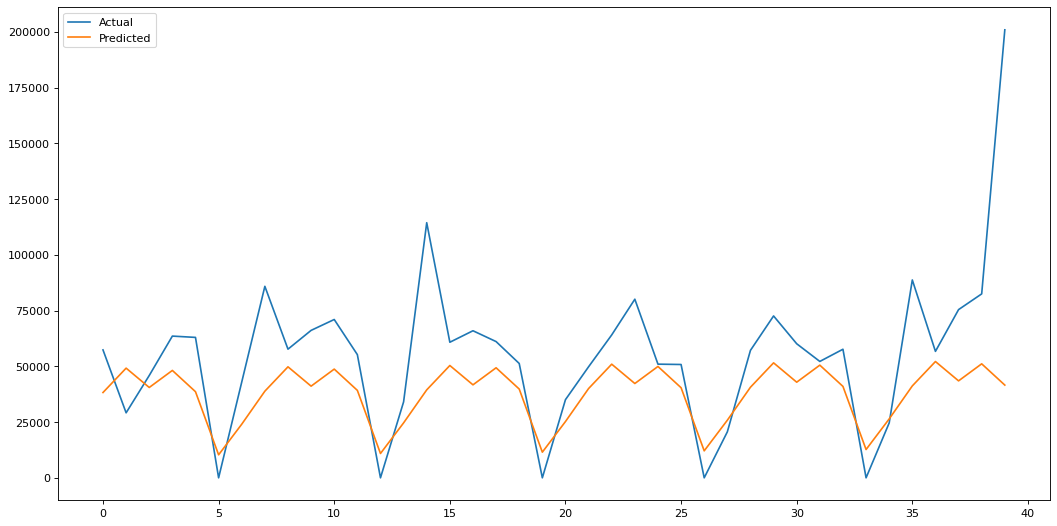

In [81]:
prophet = Prophet(seasonality_mode = 'additive')  # default 값 'additive'
prophet.fit(train)
future = prophet.make_future_dataframe(periods=40)
forecast = prophet.predict(future)
ph_yhat = forecast[['ds','yhat']][334:]

figure(figsize=(16,8), dpi=80)
plt.plot(test['y'].values, label='Actual')
plt.plot(ph_yhat['yhat'].values, label='Predicted')
plt.legend()
plt.show()

13:23:47 - cmdstanpy - INFO - Chain [1] start processing
13:23:47 - cmdstanpy - INFO - Chain [1] done processing


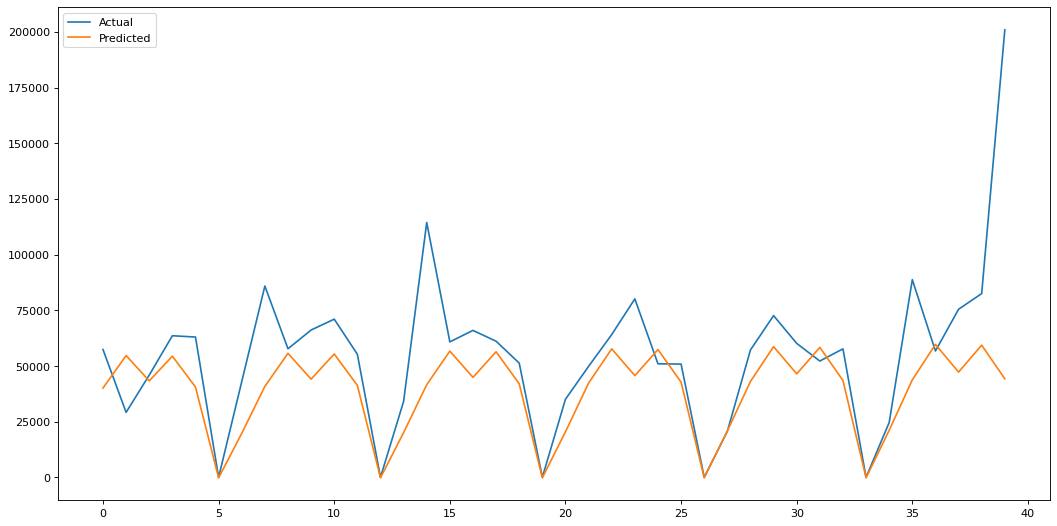

In [82]:
prophet = Prophet(seasonality_mode = 'multiplicative')  # default 값 'additive'
prophet.fit(train)
future = prophet.make_future_dataframe(periods=40)
forecast = prophet.predict(future)
ph_yhat = forecast[['ds','yhat']][334:]

figure(figsize=(16,8), dpi=80)
plt.plot(test['y'].values, label='Actual')
plt.plot(ph_yhat['yhat'].values, label='Predicted')
plt.legend()
plt.show()

# 시계열 데이터의 진폭이 점점 증가하거나 감소하는것이 잘 나타남

### changepoint_range

13:23:47 - cmdstanpy - INFO - Chain [1] start processing
13:23:47 - cmdstanpy - INFO - Chain [1] done processing


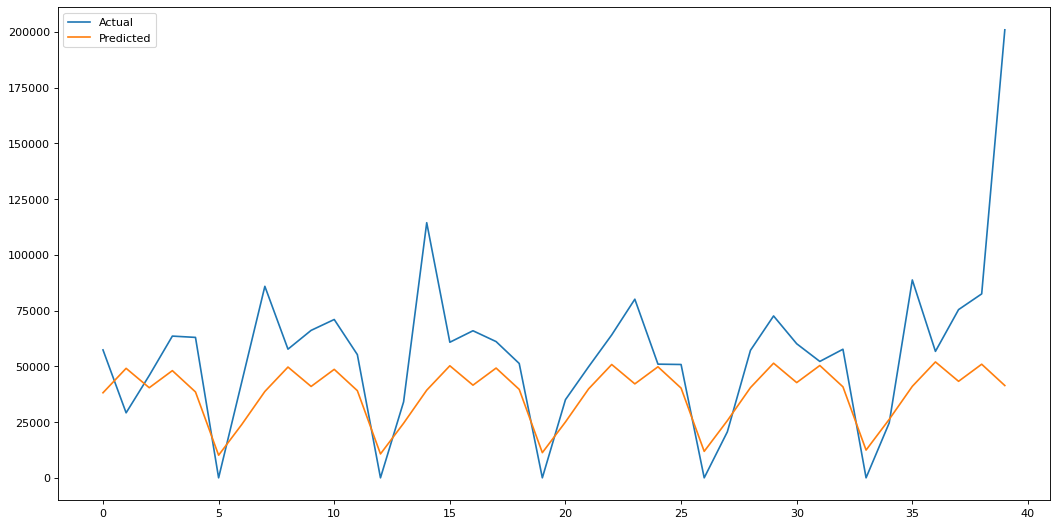

In [83]:
prophet = Prophet(changepoint_range = 0.95)  # default 값 0.8
prophet.fit(train)
future = prophet.make_future_dataframe(periods=40)
forecast = prophet.predict(future)
ph_yhat = forecast[['ds','yhat']][334:]

figure(figsize=(16,8), dpi=80)
plt.plot(test['y'].values, label='Actual')
plt.plot(ph_yhat['yhat'].values, label='Predicted')
plt.legend()
plt.show()


13:23:48 - cmdstanpy - INFO - Chain [1] start processing
13:23:48 - cmdstanpy - INFO - Chain [1] done processing


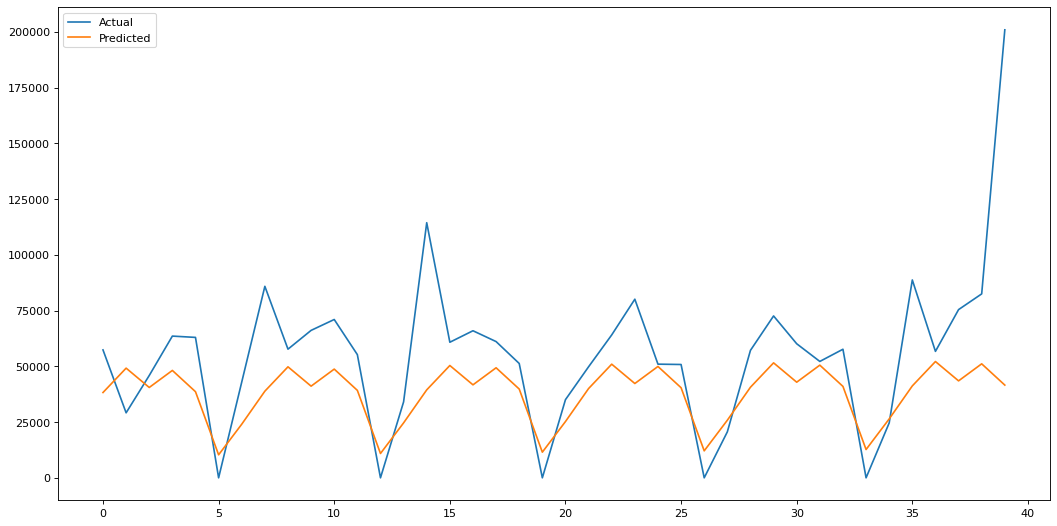

In [84]:
prophet = Prophet(changepoint_range = 0.8)  # default 값 0.8
prophet.fit(train)
future = prophet.make_future_dataframe(periods=40)
forecast = prophet.predict(future)
ph_yhat = forecast[['ds','yhat']][334:]

figure(figsize=(16,8), dpi=80)
plt.plot(test['y'].values, label='Actual')
plt.plot(ph_yhat['yhat'].values, label='Predicted')
plt.legend()
plt.show()

# 최대 0.95로 했을 떄와 변동이 크게 없는 것 같음

### changepoint_prior_scale


13:23:49 - cmdstanpy - INFO - Chain [1] start processing
13:23:49 - cmdstanpy - INFO - Chain [1] done processing


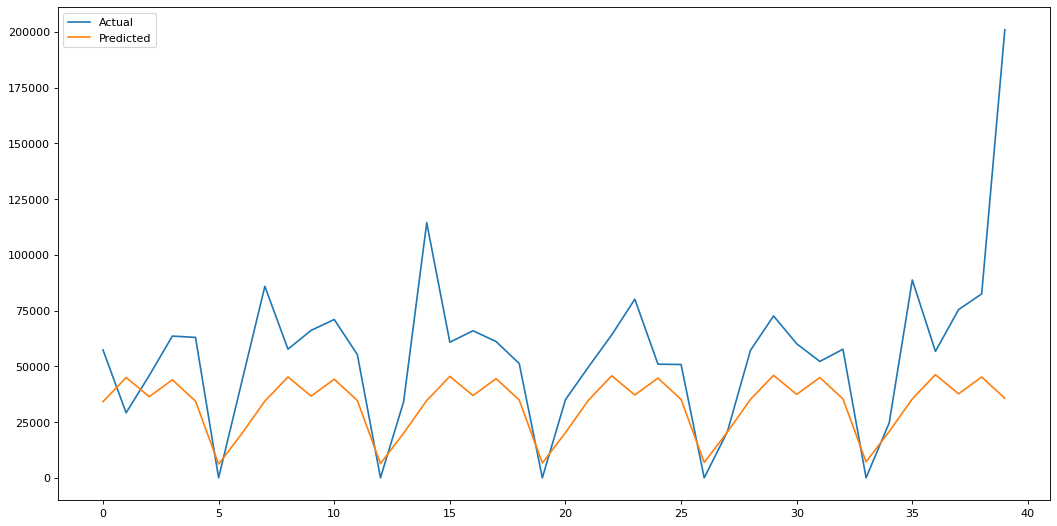

In [85]:
prophet = Prophet(changepoint_prior_scale = 0.01)  # default 값 0.05
prophet.fit(train)
future = prophet.make_future_dataframe(periods=40)
forecast = prophet.predict(future)
ph_yhat = forecast[['ds','yhat']][334:]

figure(figsize=(16,8), dpi=80)
plt.plot(test['y'].values, label='Actual')
plt.plot(ph_yhat['yhat'].values, label='Predicted')
plt.legend()
plt.show()

# changepoint_range과 비교했을 때 진폭이 낮아진 것을 확인할 수 있음